<a href="https://colab.research.google.com/github/pande1sachin/EDA-Project-Hotel-Booking-Analysis/blob/main/Team_Copy_%7C_EDA_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Exploratory Data Analysis - Hotel Booking Analysis



##### **Project Type**    - EDA (Exploratory Data Analysis)
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**   Sachin Durgaprasad Pande
##### **Team Member 2 -**   Bhanu Pratap Singh
##### **Team Member 3 -**   Lucky Mithilesh Jaiswal
##### **Team Member 4 -**   Aditi Ranuji Jachak

# **Project Summary -**

> In the given dataset i.e Hotel Bookings.csv, we are provided with hotel booking data for a city hotel and a resort hotel. It basiclly contains 119390 rows and 32 columns. Before starting analysis and visualization on the given data, we first did some data wrangling/cleaning activities like handling null/missing values, converting relevant columns/variables into required data types.

> Finally after doing data wrangling and cleaning we had 87228 rows and 34 columns/variables, variables in the dataset are 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_stays_nights', 'adults', 'children', 'babies', 'total_guests', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'reserved_room_assigned', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date' and they contains data belonging to integer, string, float and object datatype.

> Some variables like total_guests, total_stays_nights were added so as to perform visualizatoion and analysis related tasks more efficiently.

> Data visualization containg graphical representation of the data and the insights, some of the plots which we used in our project are pair-plots to compare multiple variables, correlation heatmap to represent correlation between different variables, bar graphs, histograms, etc.

> Finally after doing all analysis and visualization we presented some potential solutions and recomendations to hotel management which could be helpful in improving and boosting hotel's future business and profitability by applying proper marketing and business strategy.

# **GitHub Link -**

Github link for project related documents: https://github.com/pande1sachin/EDA-Project-Hotel-Booking-Analysis

##### Dataset Link - https://drive.google.com/file/d/1FmihW8yI9S2zdx-YU1rsk16craCqDRbh/view?usp=sharing


# **Problem Statement**


**Depending on the various parameters about hotel industry provided to us in the given dataset, it is our objective to provide hotel management insights regarding how to improve adr (average daily rates) and boost their business and profitability.**

#### **Define Your Business Objective?**

Objective of studying this dataset is to help hotel management in designing proper business strategy and effective advertisement campaign for targeted audience which can be hotel's potential customers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# all important libraries for project are imported
import numpy as np                  # library to work numpy array
import pandas as pd                 # library for data manipulation
import matplotlib.pyplot as plt     # library for data visualisation
import seaborn as sns               # library for data visualisation

In [2]:
# This is to ignore warnings if any
# tells the program to suppress warnings if any
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Mounting google drive so as to fetch data or files in colab from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
hba_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Projects/Capestone Project 1 EDA Datasets/Hotel Bookings.csv')

### Dataset First View

In [5]:
# Dataset First Look
# sets the view of the dataframe to display all columns without hiding
pd.options.display.max_columns = None
# displays first five rows of the dataframe
hba_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# displays last five rows of the dataframe
hba_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"Number of rows in original dataset is : {hba_df.shape[0]}")
print(f"Number of columns in original dataset is : {hba_df.shape[1]}")

Number of rows in original dataset is : 119390
Number of columns in original dataset is : 32


### Dataset Information

In [8]:
# Dataset Info
# To display basic info about the type of data in columns and name of all the columns in the dataset
print(f"{hba_df.columns}\n")

hba_df.info()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 no

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'Duplicate values in the dataset earlier: {hba_df.duplicated().sum()}\n')  # prints number of duplicate values in the dataset

# created a copy of original dataset so as to keep original dataset intact
c_hba_df = hba_df.copy()

c_hba_df.drop_duplicates(inplace = True)                                           # removes duplicates from the dataset
print(f'Duplicates in the dataset now: {c_hba_df.duplicated().sum()}')              # checks that there are no duplicate values remaining in the dataset

Duplicate values in the dataset earlier: 31994

Duplicates in the dataset now: 0


In [10]:
# checking the number of rows and columns after removel of the duplicates from the dataset
print(f"Number of rows in modified dataset is : {c_hba_df.shape[0]}")
print(f"Number of columns in modified dataset is : {c_hba_df.shape[1]}")

Number of rows in modified dataset is : 87396
Number of columns in modified dataset is : 32


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
# checking null values in the dataset column by column and arranging them in descending order so as to identify columns with most number of null values
null_value_info_df = pd.DataFrame(c_hba_df.isnull().sum().sort_values(ascending = False))
null_value_info_df = null_value_info_df.rename(columns = {0 : "no. of null values"}).reset_index()
null_value_info_df

,index,no. of null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0
8,hotel,0
9,previous_cancellations,0


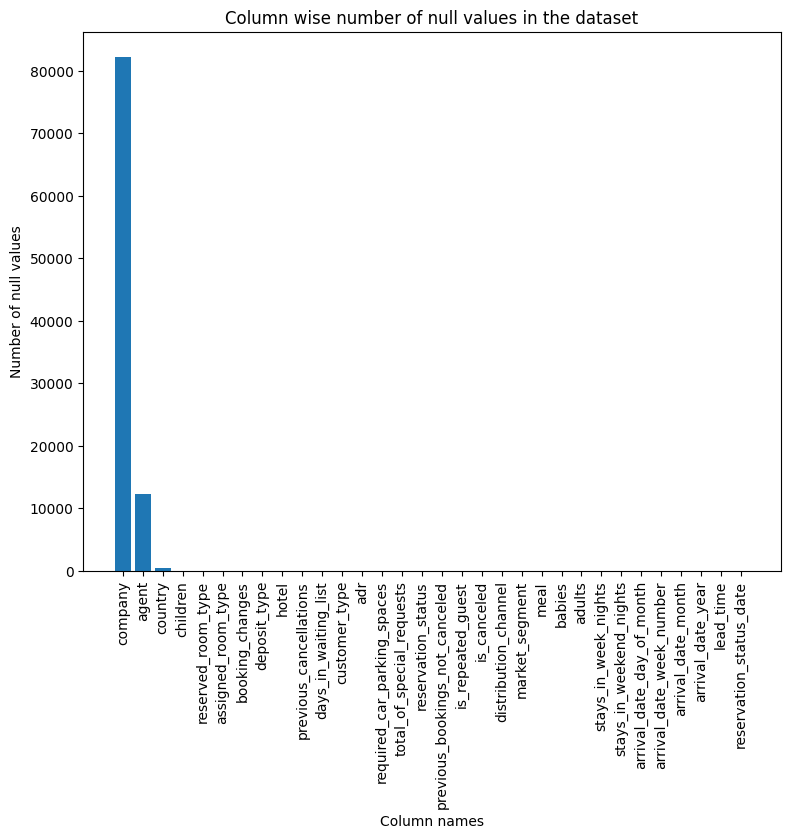

In [12]:
# Visualizing the missing values
plt.figure(figsize = (9, 7))
plt.title("Column wise number of null values in the dataset")
plt.bar(x = 'index', height = 'no. of null values', data = null_value_info_df)
plt.xlabel('Column names')
plt.xticks(rotation = 90)
plt.ylabel('Number of null values')
plt.show()

#### Columns 'company', 'agent', 'country', 'children' contains null values. Now we will check them in terms of percentage.

In [13]:
# finding percentage of the null values in the dataset column by column so that we can decide how to handle them.
# checking null values in the dataset column by column in terms of percentage and arranging them in descending order
percent_null_value_info_df = pd.DataFrame(round((c_hba_df.isnull().sum() * 100) / len(c_hba_df), 3).sort_values(ascending = False))
percent_null_value_info_df = percent_null_value_info_df.rename(columns = {0 : "% null values"})
percent_null_value_info_df.head()

,% null values
company,93.983
agent,13.951
country,0.517
children,0.005
reserved_room_type,0.000


#### Variables/columns in the dataset having null values are  'company', 'agent', 'country' and 'children' having 93.983 %, 13.951 %, 0.517 % and 0.005 % null values.

#### As 'company' have 93.983 % null values we will drop/delete them from dataset.

In [14]:
# removing mentioned row from the dataframe
c_hba_df.drop(columns = ['company'], inplace = True)

#### 'agent', 'country' and 'children' have 13.951 %, 0.517 % and 0.005 % null values. Which is very less so we replace null values from these two columns with the most frequent (mode) values of resoective columns.

In [15]:
# filling null values with most frequently appearing values(i.e. mode) in each respective columns
c_hba_df['agent'] = c_hba_df['agent'].fillna(c_hba_df['agent'].mode()[0])
c_hba_df['country'] = c_hba_df['country'].fillna(c_hba_df['country'].mode()[0])
c_hba_df['children'] = c_hba_df['children'].fillna(c_hba_df['children'].mode()[0])

In [16]:
# Checking for null values in the dataset after removing them from the dataset
c_hba_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [17]:
# checking the number of rows and columns after removing null values from the dataset
print(f"Number of rows in modified dataset is : {c_hba_df.shape[0]}")
print(f"Number of columns in modified dataset is : {c_hba_df.shape[1]}")

Number of rows in modified dataset is : 87396
Number of columns in modified dataset is : 31


### All the null values are removed successfully.

### What did you know about your dataset?

After removing all the null values and droping/removing the columns having significant amount of null values, dataset have 87396 rows and 30 columns

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
list(c_hba_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [19]:
c_hba_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01


#### Basic statistical discreption of each column in the dataset

In [20]:
# Dataset Describe
c_hba_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,82.260287,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.061182,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

#### Details of the variables/column names is as below:
* 'hotel' : Type of hotel (Resort Hotel or City Hotel)
* 'is_canceled' : Cancelation status (canceled or not)
* 'lead_time' : Days before arrival of the guest
* 'arrival_date_year' : Booking year
* 'arrival_date_month' : Booking month
* 'arrival_date_week_number' : Booking week
* 'arrival_date_day_of_month' : Booking date/day
* 'stays_in_weekend_nights' : Number of weekends guest stayed
* 'stays_in_week_nights' : Number of weekdays guest stayed
* 'adults' : Number of adults
* 'children' : Number of children
* 'babies' : Number of babies
* 'meal' :
  * BB : Bed & Breakfast
  * HB : only two meals including breakfast meal
  * FB : breakfast, lunch, and dinner
* 'country' : Country to which guest belongs
* 'market_segment' :
  * 'Direct' : Whether direct
  * 'Corporate' : Whether corporate
  * 'Online TA' : Whether through online travel agent
  * 'Offline TA/TO' : Whether through offline travel agent/tour operator
  * 'Complementary' : Whether complementary
  * 'Groups' : Whether groups
  * 'Undefined' : If undefined
  * 'Aviation' : if aviation
* 'distribution_channel' : Details about distribution_channel
  * ('Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS')
* 'is_repeated_guest' : 0 or 1 accordingly if it is a repeated guest or not
* 'previous_cancellations' : Cancelled in past
* 'previous_bookings_not_canceled' : Not cancelled in past
* 'reserved_room_type' : Type of reserved room
* 'assigned_room_type' : Type of assigned room
* 'booking_changes' : How many times changes in bookings were made
* 'deposit_type' : Type of payment/deposite
* 'agent' : Agent id
* 'days_in_waiting_list' : Number of days in waiting list
* 'customer_type' : Type of customer
* 'adr' : Average Daily Rate
* 'required_car_parking_spaces' : If parking space is required
* 'total_of_special_requests' : Number of special requests made by the customer
* 'reservation_status' : Whether 'Check-Out', 'Canceled' or 'No-Show'
* 'reservation_status_date' : Date of the respective statusAnswer Here

In [21]:
# Checking variables having discrete values representing different categories or groups.
print("Variables having discrete values representing different categories or groups in dataset:")
print('=='*45,'\n')
count = 0
for name_of_column in c_hba_df.columns:
  if c_hba_df[name_of_column].dtypes == 'O':
    count += 1
    print(f"{count}). {name_of_column}")
print('=='*45,'\n')
print(f"\nTotal {count} variables/columns in dataset have discrete values representing different categories or groups in dataset")

Variables having discrete values representing different categories or groups in dataset:

1). hotel
2). arrival_date_month
3). meal
4). country
5). market_segment
6). distribution_channel
7). reserved_room_type
8). assigned_room_type
9). deposit_type
10). customer_type
11). reservation_status
12). reservation_status_date


Total 12 variables/columns in dataset have discrete values representing different categories or groups in dataset


In [22]:
# Checking variables having numerical values.
print("Variables having numerical values in dataset:")
print('=='*25,'\n')
count = 0
for name_of_column in c_hba_df.columns:
  if c_hba_df[name_of_column].dtypes != 'O':
    count += 1
    print(f"{count}). {name_of_column}")
print('=='*45,'\n')
print(f"\nTotal {count} variables/columns have numerical values in dataset")

Variables having numerical values in dataset:

1). is_canceled
2). lead_time
3). arrival_date_year
4). arrival_date_week_number
5). arrival_date_day_of_month
6). stays_in_weekend_nights
7). stays_in_week_nights
8). adults
9). children
10). babies
11). is_repeated_guest
12). previous_cancellations
13). previous_bookings_not_canceled
14). booking_changes
15). agent
16). days_in_waiting_list
17). adr
18). required_car_parking_spaces
19). total_of_special_requests


Total 19 variables/columns have numerical values in dataset


### Check Unique Values for each variable.

In [23]:
# Checking unique values for each variable/column.
print("Unique value for each variable in dataset:")
for name_of_column in c_hba_df.columns:
  print("=="*25)
  print(f"{name_of_column}: {c_hba_df[name_of_column].unique()}")

Unique value for each variable in dataset:
hotel: ['Resort Hotel' 'City Hotel']
is_canceled: [0 1]
lead_time: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 3

In [24]:
# Check number of unique values for each variable/column.
print("Number of unique value for each variable/column in dataset:")
print("=="*25)
for name_of_column in c_hba_df.columns:
  print(f"{name_of_column}: {c_hba_df[name_of_column].nunique()} unique values.\n")

Number of unique value for each variable/column in dataset:
hotel: 2 unique values.

is_canceled: 2 unique values.

lead_time: 479 unique values.

arrival_date_year: 3 unique values.

arrival_date_month: 12 unique values.

arrival_date_week_number: 53 unique values.

arrival_date_day_of_month: 31 unique values.

stays_in_weekend_nights: 17 unique values.

stays_in_week_nights: 35 unique values.

adults: 14 unique values.

children: 5 unique values.

babies: 5 unique values.

meal: 5 unique values.

country: 177 unique values.

market_segment: 8 unique values.

distribution_channel: 5 unique values.

is_repeated_guest: 2 unique values.

previous_cancellations: 15 unique values.

previous_bookings_not_canceled: 73 unique values.

reserved_room_type: 10 unique values.

assigned_room_type: 12 unique values.

booking_changes: 21 unique values.

deposit_type: 3 unique values.

agent: 333 unique values.

days_in_waiting_list: 128 unique values.

customer_type: 4 unique values.

adr: 8879 uniq

## 3. ***Data Wrangling***

### Data Wrangling Code

### Some kind of basic data manipulation and wrangling like removing duplicates, handling null values by either removing them or replacing them with proper substitutes (i.e. mode) and removing irrelevant columns and rows are already done on the dataset.

### Remaining Data Wrangling we will do in this section

In [25]:
# checking dataset for inappropriate datatypes
c_hba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

### Converting datatypes

In [26]:
# Write your code to make your dataset analysis ready.
# datatype of columns children and agent is float
# so we will have to correct it by typecasting it to proper datatypes
c_hba_df[['children', 'agent']] = c_hba_df[['children', 'agent']].astype('int64')

# also reservation_status_date contains date related data so it also needs to be properly type casted
c_hba_df['reservation_status_date'] = pd.to_datetime(c_hba_df['reservation_status_date'], format = '%Y-%m-%d')

# checking datatype of the respective columns after convertion
c_hba_df[['children','agent','reservation_status_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   children                 87396 non-null  int64         
 1   agent                    87396 non-null  int64         
 2   reservation_status_date  87396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB


In [27]:
# substituting 'canceled' or 'not canceled' in the column 'is_canceled' depending on the status of the booking
c_hba_df['is_canceled'] = c_hba_df['is_canceled'].apply(lambda x : 'not canceled' if x == 0 else 'canceled')

# adding data from columns 'stays_in_weekend_nights', 'stays_in_week_nights' and introducing a new column named as 'total_stays_nights'
total_stays = pd.Series(c_hba_df['stays_in_weekend_nights'] + c_hba_df['stays_in_week_nights'])
c_hba_df.insert(9, 'total_stays_night', total_stays, True)

In [28]:
# now adding data from the columns 'adults', 'children' and 'babies' to get number of total_guests
total = pd.Series(c_hba_df['adults'] + c_hba_df['children'] + c_hba_df['babies'])
# this puts the column we created at the position besides the column 'babies'
c_hba_df.insert(13, 'total_guests', total, True)

In [29]:
# now checking if the actually reserved room is assigned to the guest or not
# this puts the column we created at the position besides the column 'assigned_room_type'
c_hba_df.insert(23, 'reserved_room_assigned', None)
c_hba_df['reserved_room_assigned'] = c_hba_df.apply(lambda x : 'yes' if x.reserved_room_type == x.assigned_room_type else 'no', axis = 1)

In [30]:
# Number of rows and columns before applying filter
print(f"Number of rows in modified dataset is : {c_hba_df.shape[0]}")
print(f"Number of columns in modified dataset is : {c_hba_df.shape[1]}")

Number of rows in modified dataset is : 87396
Number of columns in modified dataset is : 34


In [31]:
c_hba_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stays_night,adults,children,babies,total_guests,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reserved_room_assigned,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,not canceled,342,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,0,0,0,C,C,yes,3,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [32]:
c_hba_df = c_hba_df[c_hba_df['total_guests'] != 0]

In [33]:
# Number of rows and columns before applying filter
print(f"Number of rows in modified dataset is : {c_hba_df.shape[0]}")
print(f"Number of columns in modified dataset is : {c_hba_df.shape[1]}")

Number of rows in modified dataset is : 87230
Number of columns in modified dataset is : 34


In [34]:
c_hba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  object        
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   total_stays_night               87230 non-null  int64         
 10  adults                          87230 non-null  int64         
 11  c

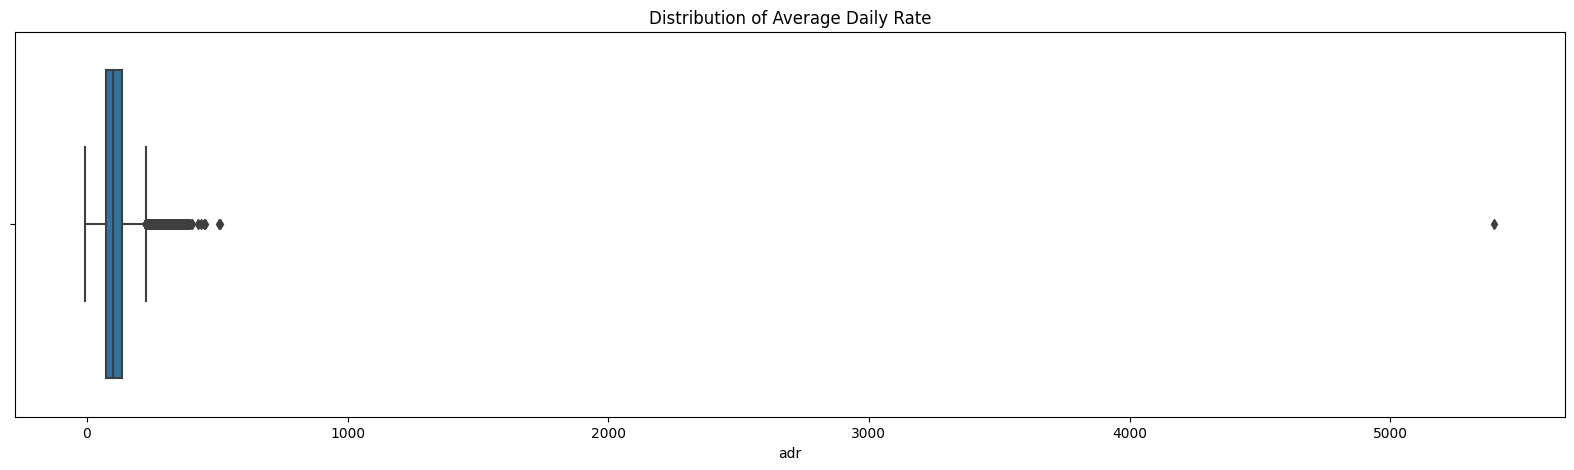

In [35]:
# Identifying the outliers to handle them
column_name = c_hba_df['adr']
plt.figure(figsize = (20, 5))
plt.title('Distribution of Average Daily Rate')
sns.boxplot(x = column_name)
plt.show()

### As we can see that there are outlier in the column "adr", so now we will eliminate it.

In [36]:
# sorting datframe in ascending values by 'adr' column
c_hba_df['adr'].sort_values()

14969       -6.38
0            0.00
29578        0.00
104959       0.00
104958       0.00
           ...   
13142      450.00
103912     451.50
15083      508.00
111403     510.00
48515     5400.00
Name: adr, Length: 87230, dtype: float64

In [37]:
# we will first row and last row of the above sorted data are outlier as
# first row contains a negative and last row contains a very high value
# which seem to be some error in data
c_hba_df.drop([14969, 48515], axis=0, inplace=True)

In [38]:
print(c_hba_df.shape)
# Number of rows and columns before applying filter
print(f"Number of rows in modified dataset is : {c_hba_df.shape[0]}")
print(f"Number of columns in modified dataset is : {c_hba_df.shape[1]}")

(87228, 34)
Number of rows in modified dataset is : 87228
Number of columns in modified dataset is : 34


### What all manipulations have you done and insights you found?

#### 1). First of all to keep the original dataframe intact we created a copy of the original dataframe by using ".copy()" method and performed all manipulation and wrangling on that copy.
#### 2). By using ".drop_duplicates()" method we eliminated duplicate values.
#### 3). Handled missing or null values in following ways:
 * > #### The 'company' column has 93.983 % missing or null values so we removed the column from the dataset.
 * > #### And columns "agent", "country" and "children" have 13.951 %, 0.517 % and 0.005 % so we substituted mode i.e. most frequently appearing value in respective rows of the above mentioned columns.

#### 4). For correctly performing manipulation and visualisation tasks on the data it should have proper datatype i.e. integer, float, string, datetime, etc. So we converted data in "children",  "agent" and "reservation_status_date" columns to integer and datetime datatype.
#### 5). Data in column 'is_cancelled' is substituted with 'not canceled' or 'canceled' considering the older values in the column i.e. 0 or 1.
#### 6). Added a column 'total_stays_nights' in the dataframe and the data in that column is addition of data from two columns 'stays_in_weekend_nights' ,'stays_in_week_nights' for each respective rows.
#### 7). For calculating total number of guests we added data from the columns 'adults', 'children' and 'babies' and stored in a new column named "total_guests"
#### 8). We created a new column " reserved_room_assigned" and updated it with the status 'yes' or 'no' depending on the values in the columns 'reserved_room_type'  and 'assigned_room_type' whether they matches or not for each row.
#### 9). After updating data regarding total number of guests we filtered out the row where total number of guests is zero i.e. 0 and eliminated such rows from the dataframe.
#### 10). We identified outliers from the column "adr" and eliminated them.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [39]:
c_hba_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stays_night,adults,children,babies,total_guests,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reserved_room_assigned,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,not canceled,342,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,0,0,0,C,C,yes,3,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01


#### Chart - 1: Distribution of the hotels.

          index  hotel  percent
0    City Hotel  53273    61.07
1  Resort Hotel  33955    38.93


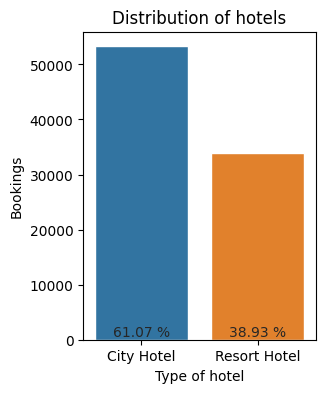

In [40]:
# Chart - 1 visualization code
# To represent the distribution of the hotels if resort hotel or city hotel
hotel_count = c_hba_df['hotel'].value_counts().reset_index()
value_sum = sum(hotel_count['hotel'])
hotel_count['percent'] = round(hotel_count['hotel'].apply(lambda x : (x / value_sum) * 100), 2) # calculates percentage
print(hotel_count)

# Plots bargraph for the distribution of hotels
plt.figure(figsize=(3, 4))
plt.title("Distribution of hotels")
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'hotel', data = hotel_count)
for i, percent in enumerate(hotel_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('Type of hotel')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand, thus we have selected bar graph to display the distribution of hotels.

##### 2. What is/are the insight(s) found from the chart?

From the above visualisation we found that out of total bookings approximately 61 % were in 'City Hotel' and  39 % bookings were in 'Resort Hotel'. So we can say that city hotel booked more often as compared to resort hotels.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights gained shows that demand for city hotel is high whereas demand for resort hotel is low. Considering above results resort hotel owners can do some changes in their pricing strategy, also they can start attractive offers with free pick up and drop service sp as to attract customers. They can also target vacation season with some attractive offers to attract the customers

#### Chart - 2: Checking booking status distribution.

          index  is_canceled  percent
0  not canceled        63220    72.48
1      canceled        24008    27.52


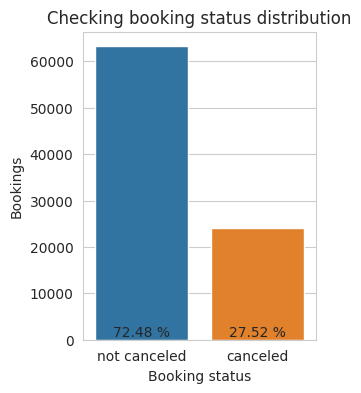

In [41]:
# Chart - 2 visualization codes
# Booking status distribution
canceled_booking_count = c_hba_df['is_canceled'].value_counts().reset_index()
value_sum = sum(canceled_booking_count['is_canceled'])
canceled_booking_count['percent'] = round(canceled_booking_count['is_canceled'].apply(lambda x : (x / value_sum) * 100), 2) # calculates percentage
print(canceled_booking_count)

# Plots booking status distribution
plt.figure(figsize=(3, 4))
plt.title("Checking booking status distribution")
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'is_canceled', data = canceled_booking_count)
for i, percent in enumerate(canceled_booking_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('Booking status')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand, thus we have selected bar graph to display the proportion of canceled and not-canceled bookings.

##### 2. What is/are the insight(s) found from the chart?

Out of the total bookings made at the hotel around 28 percent bookings were canceled and 72 percent bookings are not canceled which is a positive aspect of the bookings data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, even though the guests who have canceled their bookings are comparatively low i.e. 27.52 %, but still it is a considerable number. So this insight regarding canceled bookings will help management of the hotel to focus and get feedback and find out reasons for the cancelation of the bookings and improve on the short commings.

#### Chart - 3: Checking distribution of arrival date year.

   index  arrival_date_year  percent
2   2015              13284    15.23
0   2016              42312    48.51
1   2017              31632    36.26


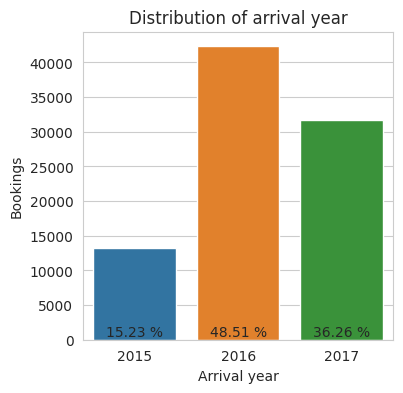

In [42]:
# Chart - 3 visualization code
# Checking distribution of arrival date year
arrival_year_count = c_hba_df['arrival_date_year'].value_counts().reset_index()
value_sum = sum(arrival_year_count['arrival_date_year'])
arrival_year_count['percent'] = round(arrival_year_count['arrival_date_year'].apply(lambda x : (x / value_sum) * 100), 2) # calculates percentage
arrival_year_count.sort_values(by = 'index', inplace = True)
print(arrival_year_count)

# plots year wise bookings
plt.figure(figsize=(4, 4))
plt.title("Distribution of arrival year")
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'arrival_date_year', data = arrival_year_count)
for i, percent in enumerate(arrival_year_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('Arrival year')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display the number and proportion of year wise bookings.

##### 2. What is/are the insight(s) found from the chart?

For the bookings data provided in the dataset 2016 is the year that holds around 49 % bookings out of the total bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the number of bookings are more for 2016 as compared to 2017 this insight will help management to find out the reasons for a drop in number of bookings from 2016 to 2017, so as to make a proper strategy for future business opportunities.

#### Chart - 4: Distribution of arrival date month (Univariate).

        index  arrival_date_month  percent
0      August               11242    12.89
1        July               10043    11.51
2         May                8344     9.57
3       April                7900     9.06
4        June                7756     8.89
5       March                7487     8.58
6     October                6921     7.93
7   September                6682     7.66
8    February                6083     6.97
9    December                5112     5.86
10   November                4973     5.70
11    January                4685     5.37


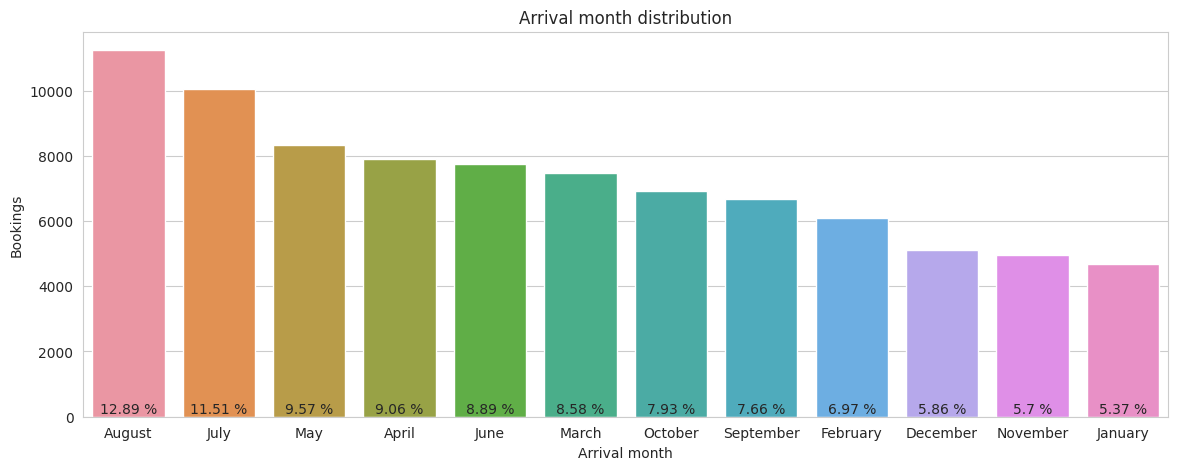

In [43]:
# Chart - 4 visualization code
# Distribution of arrival date month
arrival_month_count = c_hba_df['arrival_date_month'].value_counts().reset_index()
value_sum = sum(arrival_month_count['arrival_date_month'])
arrival_month_count['percent'] = round(arrival_month_count['arrival_date_month'].apply(lambda x : (x / value_sum) * 100), 2) # calculates percentage
print(arrival_month_count)

# plots month wise bookings
plt.figure(figsize = (14, 5))
plt.title("Arrival month distribution")
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'arrival_date_month', data = arrival_month_count)
for i, percent in enumerate(arrival_month_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('Arrival month')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display the number and proportion of monthly bookings so as to get a glimps regarding which month has got highest number of bookings.

##### 2. What is/are the insight(s) found from the chart?

Around 43 % bookings are made for the month August, July, May and April, with August is at top of the list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the month of August and July number of bookings are high as compared to rest of the year. This insight will help to focus more on this period as this might be holiday period, so that hotels should get more bookings in this duration.

#### Chart - 5: Market segment distribution.

           index  market_segment  percent
0      Online TA           51553    59.10
1  Offline TA/TO           13854    15.88
2         Direct           11780    13.50
3         Groups            4921     5.64
4      Corporate            4200     4.81
5  Complementary             692     0.79
6       Aviation             226     0.26
7      Undefined               2     0.00


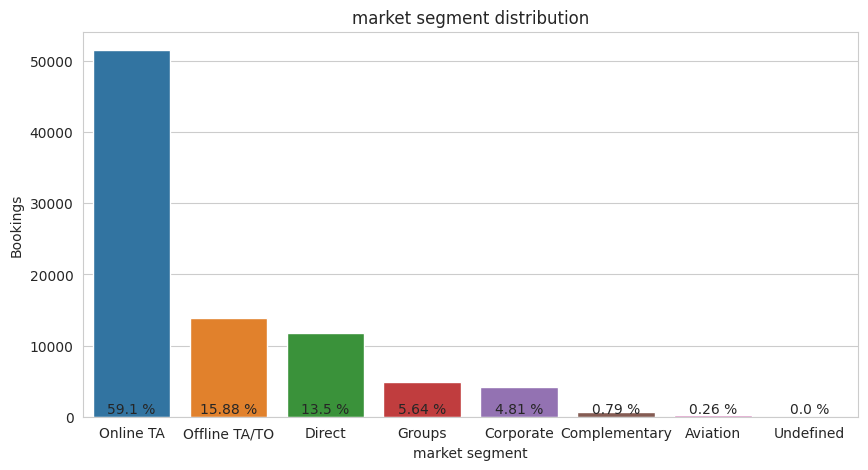

In [44]:
# Chart - 5 visualization code
# Market segment distribution
market_segment_count = c_hba_df['market_segment'].value_counts().reset_index()
value_sum = sum(market_segment_count['market_segment'])
market_segment_count['percent'] = round(market_segment_count['market_segment'].apply(lambda x : (x / value_sum) * 100), 2) # calculates percentage
print(market_segment_count)

# Plots barplot for market segment distribution of bookings
plt.figure(figsize = (10, 5))
plt.title("market segment distribution")
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'market_segment', data = market_segment_count)
for i, percent in enumerate(market_segment_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('market segment')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display which market segment has brought maximun number of bookings to the hotel.

##### 2. What is/are the insight(s) found from the chart?

It is visible that the market segment contributing maximum bookings is 'Online TA' which is around 59 % followed by 'offline TA/TO' contributing approximately 16 % bookings and direct bookings are around 14 % percent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As most of the bookings come from Online TA segment of the market, hotel should try to focus on getting more bookings from Corporate and Aviation segments as they are usually high paying market segments so that the ADR could be increased.

#### Chart - 6: "distribution channel" distribution.

       index  distribution_channel  percent
0      TA/TO                 69027    79.13
1     Direct                 12953    14.85
2  Corporate                  5062     5.80
3        GDS                   181     0.21
4  Undefined                     5     0.01


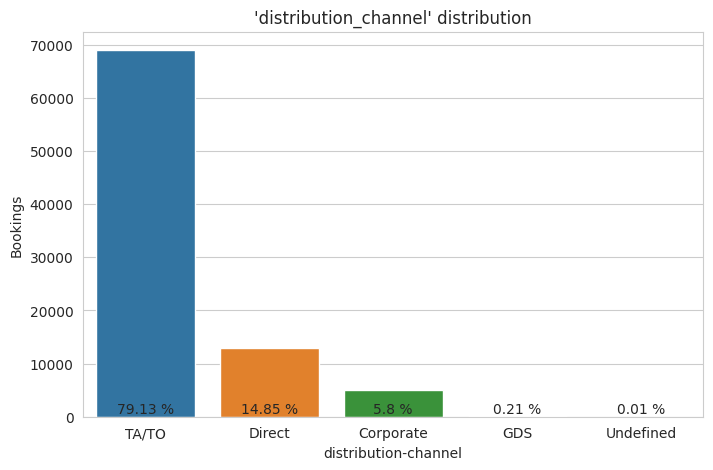

In [45]:
# Chart - 6 visualization code
# "distribution_channel" distribution

distribution_channel_count = c_hba_df['distribution_channel'].value_counts().reset_index()
value_sum = sum(distribution_channel_count['distribution_channel'])
# calculates percentage
distribution_channel_count['percent'] = round(distribution_channel_count['distribution_channel'].apply(lambda x : (x / value_sum) * 100), 2)
print(distribution_channel_count)

# plots bargraph for distribution-channel wise number of bookings
plt.figure(figsize = (8, 5))
plt.title("'distribution_channel' distribution")
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'distribution_channel', data = distribution_channel_count)
for i, percent in enumerate(distribution_channel_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('distribution-channel')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display which distribution channel has contributed towards maximun number of bookings.

##### 2. What is/are the insight(s) found from the chart?

From the above bar graph it is observed that around 79 % bookings came from TA/TO distribution channel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graphs it can be said that hotel management should focus to geting more bookings from direct and corporate channel, as for direct channel no commission has to be paid to anyone so even with low ADR hotel could earn more profit, and corporate bookings usually are high paying high profit bookings.

#### Chart - 7: reserved_room_assigned 'yes' or 'no'.

  index  reserved_room_assigned  percent
0   yes                   74239    85.11
1    no                   12989    14.89


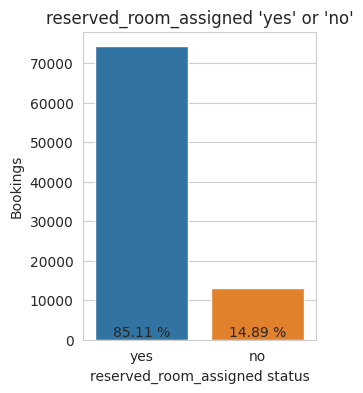

In [46]:
# Chart - 7 visualization code
# reserved_room_assigned 'yes' or 'no'
reserved_room_assigned_count = c_hba_df['reserved_room_assigned'].value_counts().reset_index()
value_sum = sum(reserved_room_assigned_count['reserved_room_assigned'])
reserved_room_assigned_count['percent'] = round(reserved_room_assigned_count['reserved_room_assigned'].apply(lambda x : (x / value_sum) * 100), 2)
print(reserved_room_assigned_count)

# plots bar graph for number of booking if they are alloted reserved room or not also displays their percentage
plt.figure(figsize = (3, 4))
plt.title("reserved_room_assigned 'yes' or 'no'")
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'reserved_room_assigned', data = reserved_room_assigned_count)
for i, percent in enumerate(reserved_room_assigned_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('reserved_room_assigned status')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display what percentage of time reserved room is assigned to the customer.

##### 2. What is/are the insight(s) found from the chart?

From the above bar graph it is observed that in approximately 85 % cases room reserved by the customer is assigned to the customer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Even though in most of the cases hotel has provided customers with the reserved room. But still there is a room for improvement as in 15 % cases reserved room was not provided. So hotel management should focus on such cases by planning proper strategy.

#### Chart - 8: Distribution of bookings by agent.

   index  agent  percent
0      9  40862    58.23
1    240  13028    18.57
2     14   3342     4.76
3      7   3294     4.69
4    250   2779     3.96
5    241   1644     2.34
6     28   1493     2.13
7      8   1383     1.97
8      1   1228     1.75
9      6   1117     1.59


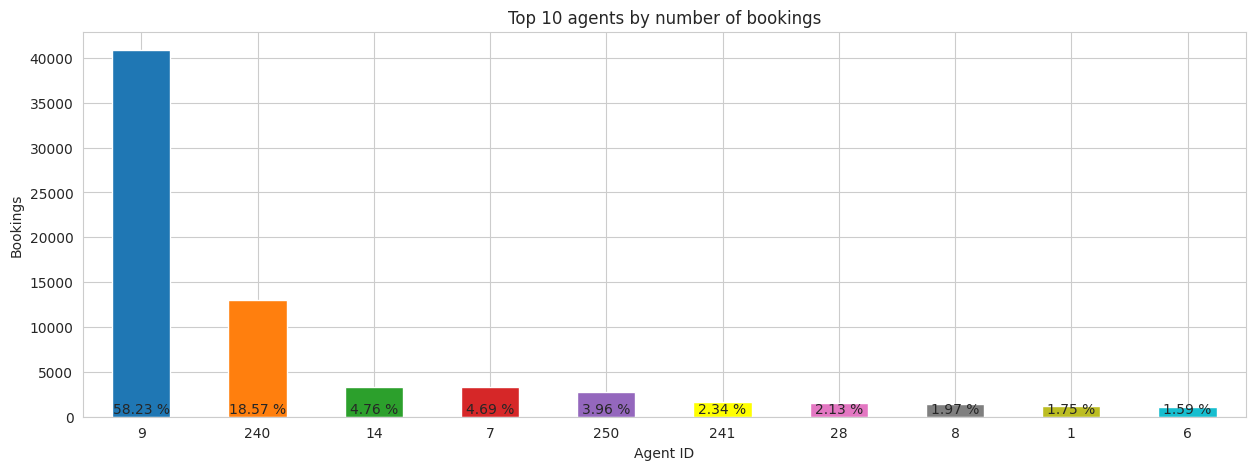

In [47]:
# Chart - 8 visualization code
# Distribution of bookings by agent (Top 10)

agent_count = c_hba_df['agent'].value_counts().reset_index()
agent_count = agent_count.sort_values(by = 'agent', ascending = False)
agent_count = agent_count.head(10)

value_sum = sum(agent_count['agent'])
agent_count['percent'] = round(agent_count['agent'].apply(lambda x : (x / value_sum) * 100), 2) # calculates percentage
print(agent_count)

#sets color list for bar graph
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#FFFF00', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# plots the count count of bookings per agent
agent_count.plot(x = 'index', y = 'agent', kind = "bar", figsize = (15, 5), title = 'Top 10 agents by number of bookings', color = color_list, legend = False)
for i, percent in enumerate(agent_count['percent']):
    plt.text(i, percent, str(percent) + ' %', ha='center', va='bottom')
plt.xlabel('Agent ID')
plt.xticks(rotation = 0)
plt.ylabel('Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display which agent has given maximum bookings to the hotel.

##### 2. What is/are the insight(s) found from the chart?

The above bar graph shows that agent with ID 9 tops the list w.r.t number of bookings through him. Agent with ID's 240 and 14 stands 2nd and 3rd respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel management should focus on incentivizing other agents as they can help hotel in getting more bookings as most of the bookings (i.e. > 50 %) are through one agent only, so there is a room for improvement.

#### Chart - 9: Checking if, is not getting the reserved room a reason for cancelation of booking.

reserved_room_assigned     no    yes
is_canceled                         
canceled                  616  23392
not canceled            12373  50847


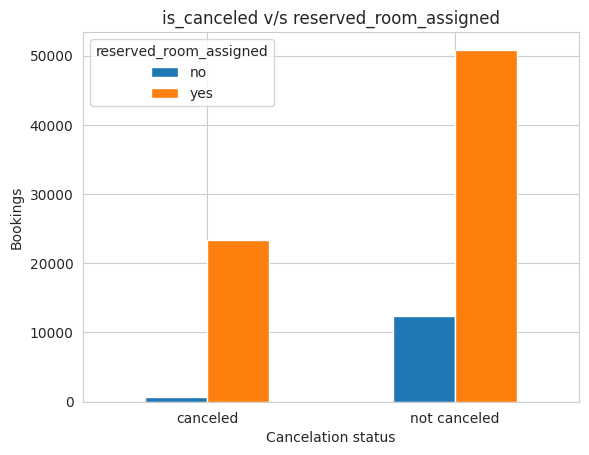

In [48]:
# Chart - 9 visualization code
is_canceled_df = c_hba_df.groupby('is_canceled')['reserved_room_assigned'].value_counts().unstack()
print(is_canceled_df)

# plots cancelation status depending on whether the guest is assigned reserved room or not
is_canceled_df.plot(kind = "bar")
plt.title("is_canceled v/s reserved_room_assigned")
plt.xlabel('Cancelation status')
plt.ylabel('Bookings')
plt.xticks(rotation = 0)
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to group and compare multiple data using bar graph, thus we have selected bar graph to display how many times bookings are canceled based on the fact whether the hotel has assigned the room as desired by the customer.

##### 2. What is/are the insight(s) found from the chart?

It is clear from the graph above that there are very less canceled bookings considering the fact that reserved room is not assigned.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As this graph tells us about the canceled and not canceled bookings, hotel management needs to focus on canceled bookings which is again sub divided in two groups i.e. 'not assigned reserved room and canceled booking' and 'assigned reserved room and canceled booking' here second group is to be focused on as eventhough reserved room was alloted to the customer booking was canceled, so hotel management should focus on developing feedback mechanism so as to find out real reason for cancelation of bookings which will help them improve over the shortcommings.

#### Chart - 10: Country wise number of bookings.

PRT    27801
GBR    10423
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: country, dtype: int64


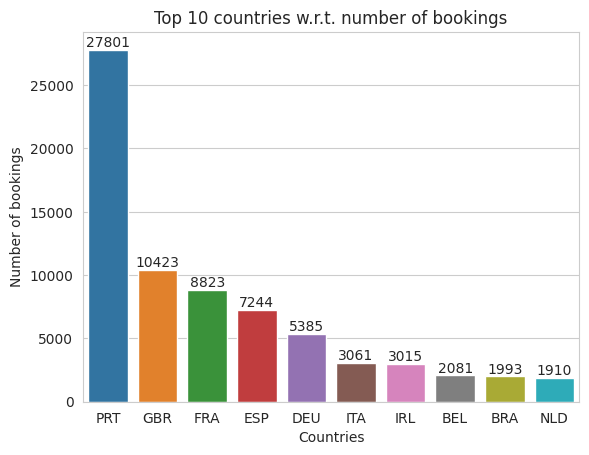

In [49]:
# Chart - 10 visualization code
country_df = c_hba_df['country'].value_counts()
country_df = country_df.head(10)
print(country_df)

# plots a bar graph for country wise number of bookings
plt.title('Top 10 countries w.r.t. number of bookings')
sns.barplot(x = country_df.index, y = country_df.values)
for i, value in enumerate(country_df.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare and group multiple data using bar graphs, thus we have selected bar graph to display country wise number of bookings and sort it in the manner as displyed in the graph.

##### 2. What is/are the insight(s) found from the chart?

After studying above shown bar graph we can clearly say that maximun guests come from Portugal followed by Great Britain, France and so on among top 10 countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Considering top countries from which most guests are coming, dedicated advertisement campaigns should be designed and implemented keeping such countries in focus so as to grab more and more customers from such countries. Hotel management should also launch attractive offers and discount because this will help hotel to acquire more and more customers.

#### Chart - 11:  ADR  v/s  Booking month

   arrival_date_month     adr
1              August  151.06
5                July  135.71
6                June  119.86
11          September  112.21
8                 May  111.31
0               April  103.70
10            October   90.32
2            December   81.74
7               March   81.16
3            February   74.86
9            November   72.97
4             January   70.16


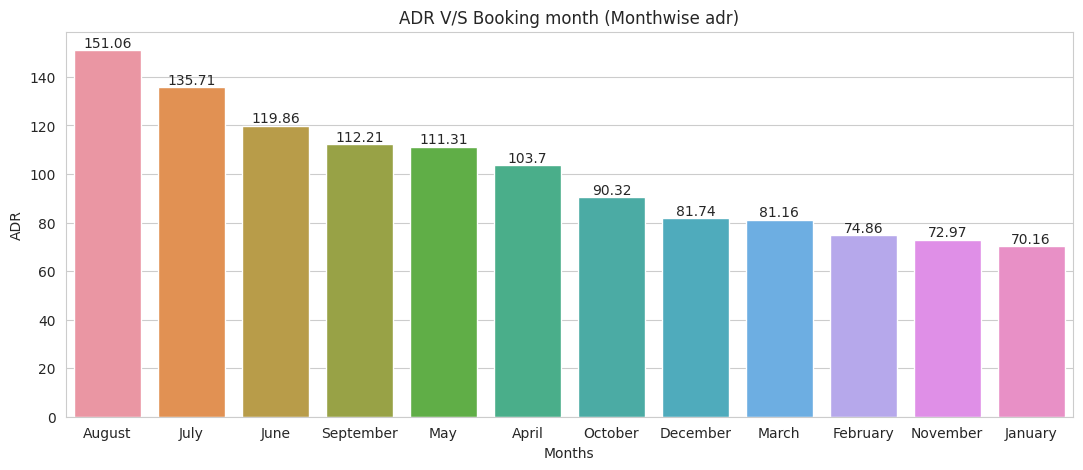

In [50]:
# Chart - 11 visualization code
# To compare adr (average daily rate) for different months
month_wise_adr = c_hba_df.groupby('arrival_date_month')['adr'].mean().reset_index()
month_wise_adr = round(month_wise_adr.sort_values(by = 'adr', ascending = False), 2)
print(month_wise_adr)

# Plots bar graph displaying month wise adr
plt.figure(figsize = (13, 5))
plt.title('ADR V/S Booking month (Monthwise adr)')
sns.barplot(x = 'arrival_date_month', y = 'adr', data = month_wise_adr)
plt.xlabel('Months')
plt.ylabel('ADR')
for i, value in enumerate(month_wise_adr['adr']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display month wise ADR (Average Daily Rate).

##### 2. What is/are the insight(s) found from the chart?

From the above visualization it is clear that adr is highest for the month of August followed by July, June, September and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Considering the adr's shown for all months in the above graph hotel management should design and implement strategies to increase adr for all months.

#### Chart - 12: Number of bookings w.r.t. months

        index  arrival_date_month
0      August               11242
1        July               10043
2         May                8344
3       April                7900
4        June                7756
5       March                7487
6     October                6921
7   September                6682
8    February                6083
9    December                5112
10   November                4973
11    January                4685


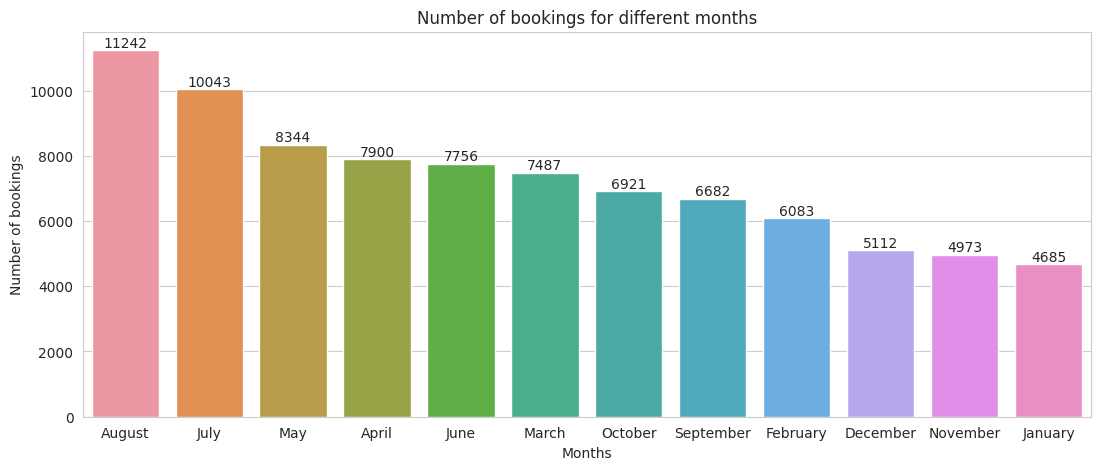

In [51]:
# Chart - 12 visualization code
# Compare number of bookings for different months
plt.figure(figsize = (13, 5))
months_df = c_hba_df[['hotel', 'arrival_date_month']]
monthly_bookings = months_df['arrival_date_month'].value_counts().reset_index()
print(monthly_bookings)

# Plots number of bookings for each month
plt.title('Number of bookings for different months')
sns.barplot(x = monthly_bookings['index'], y = monthly_bookings['arrival_date_month'])
plt.xlabel('Months')
plt.ylabel('Number of bookings')
for i, value in enumerate(monthly_bookings['arrival_date_month']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

As the data represented by bar graphs is very easy to understand and also it is easy to compare multiple data using bar graph, thus we have selected bar graph to display number of bookings for each month.

##### 2. What is/are the insight(s) found from the chart?

From the above visualization we can say that August month contributes highest number of bookings followed by July, May, April, and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the month of August and July number of bookings are high as compared to rest of the year. This insight will help to focus more on this period as this might be holiday period, so that hotels should get more bookings in this duration.

#### Chart - 13: Correlation Heatmap

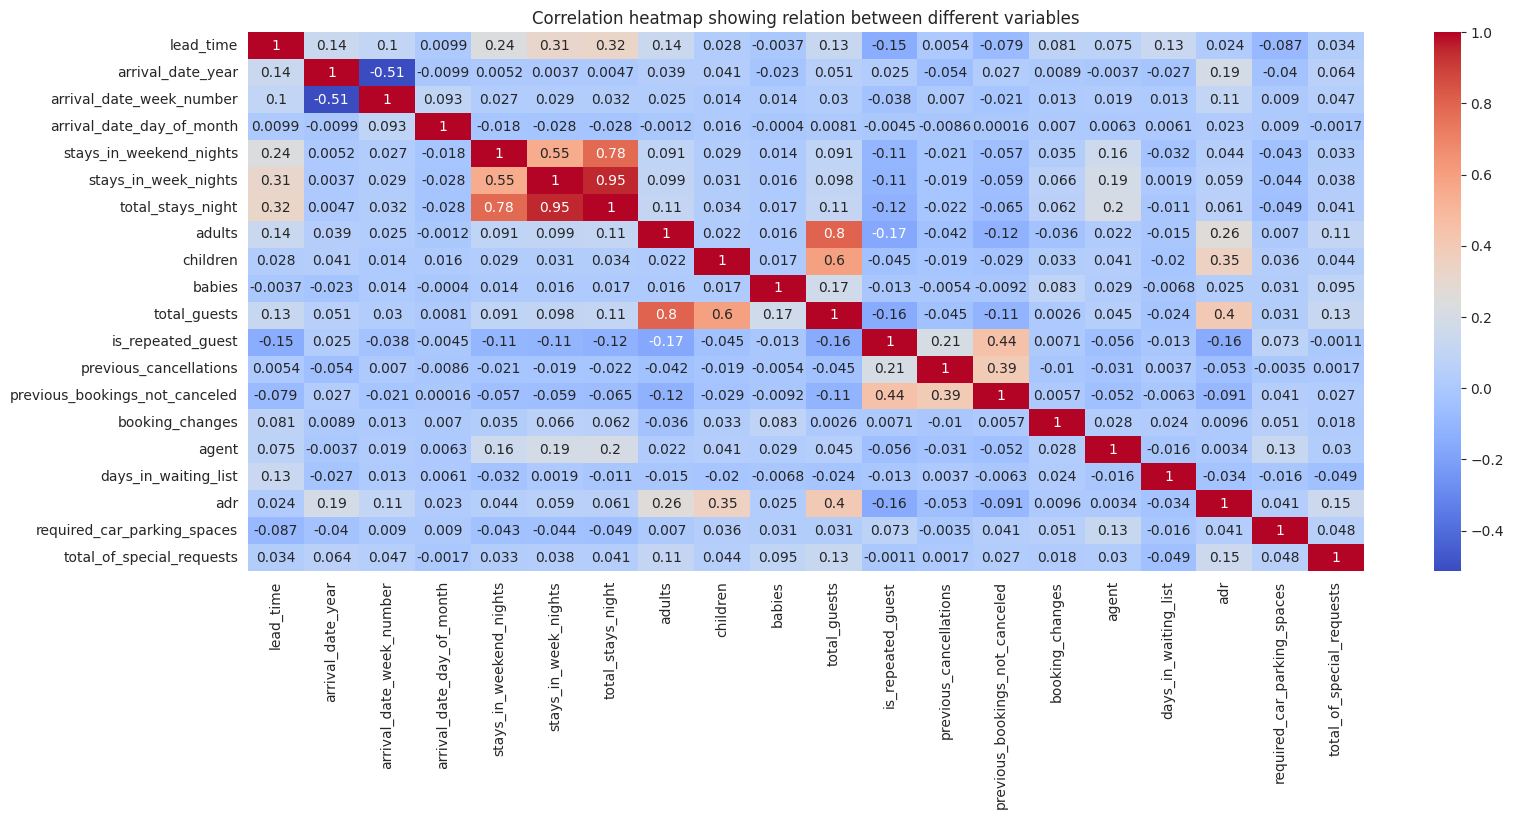

In [52]:
# Correlation Heatmap visualization code
plt.figure(figsize = (18, 7))
plt.title("Correlation heatmap showing relation between different variables")
sns.heatmap(c_hba_df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is very useful when one wants to plot correlation and also find out correlation coefficient between multiple variables in single plot.

##### 2. What is/are the insight(s) found from the chart?

* From the visualization it is observed that there is a weak correlation between lead_time and adr.

#### Chart - 14: Pair Plot

<Figure size 1000x800 with 0 Axes>

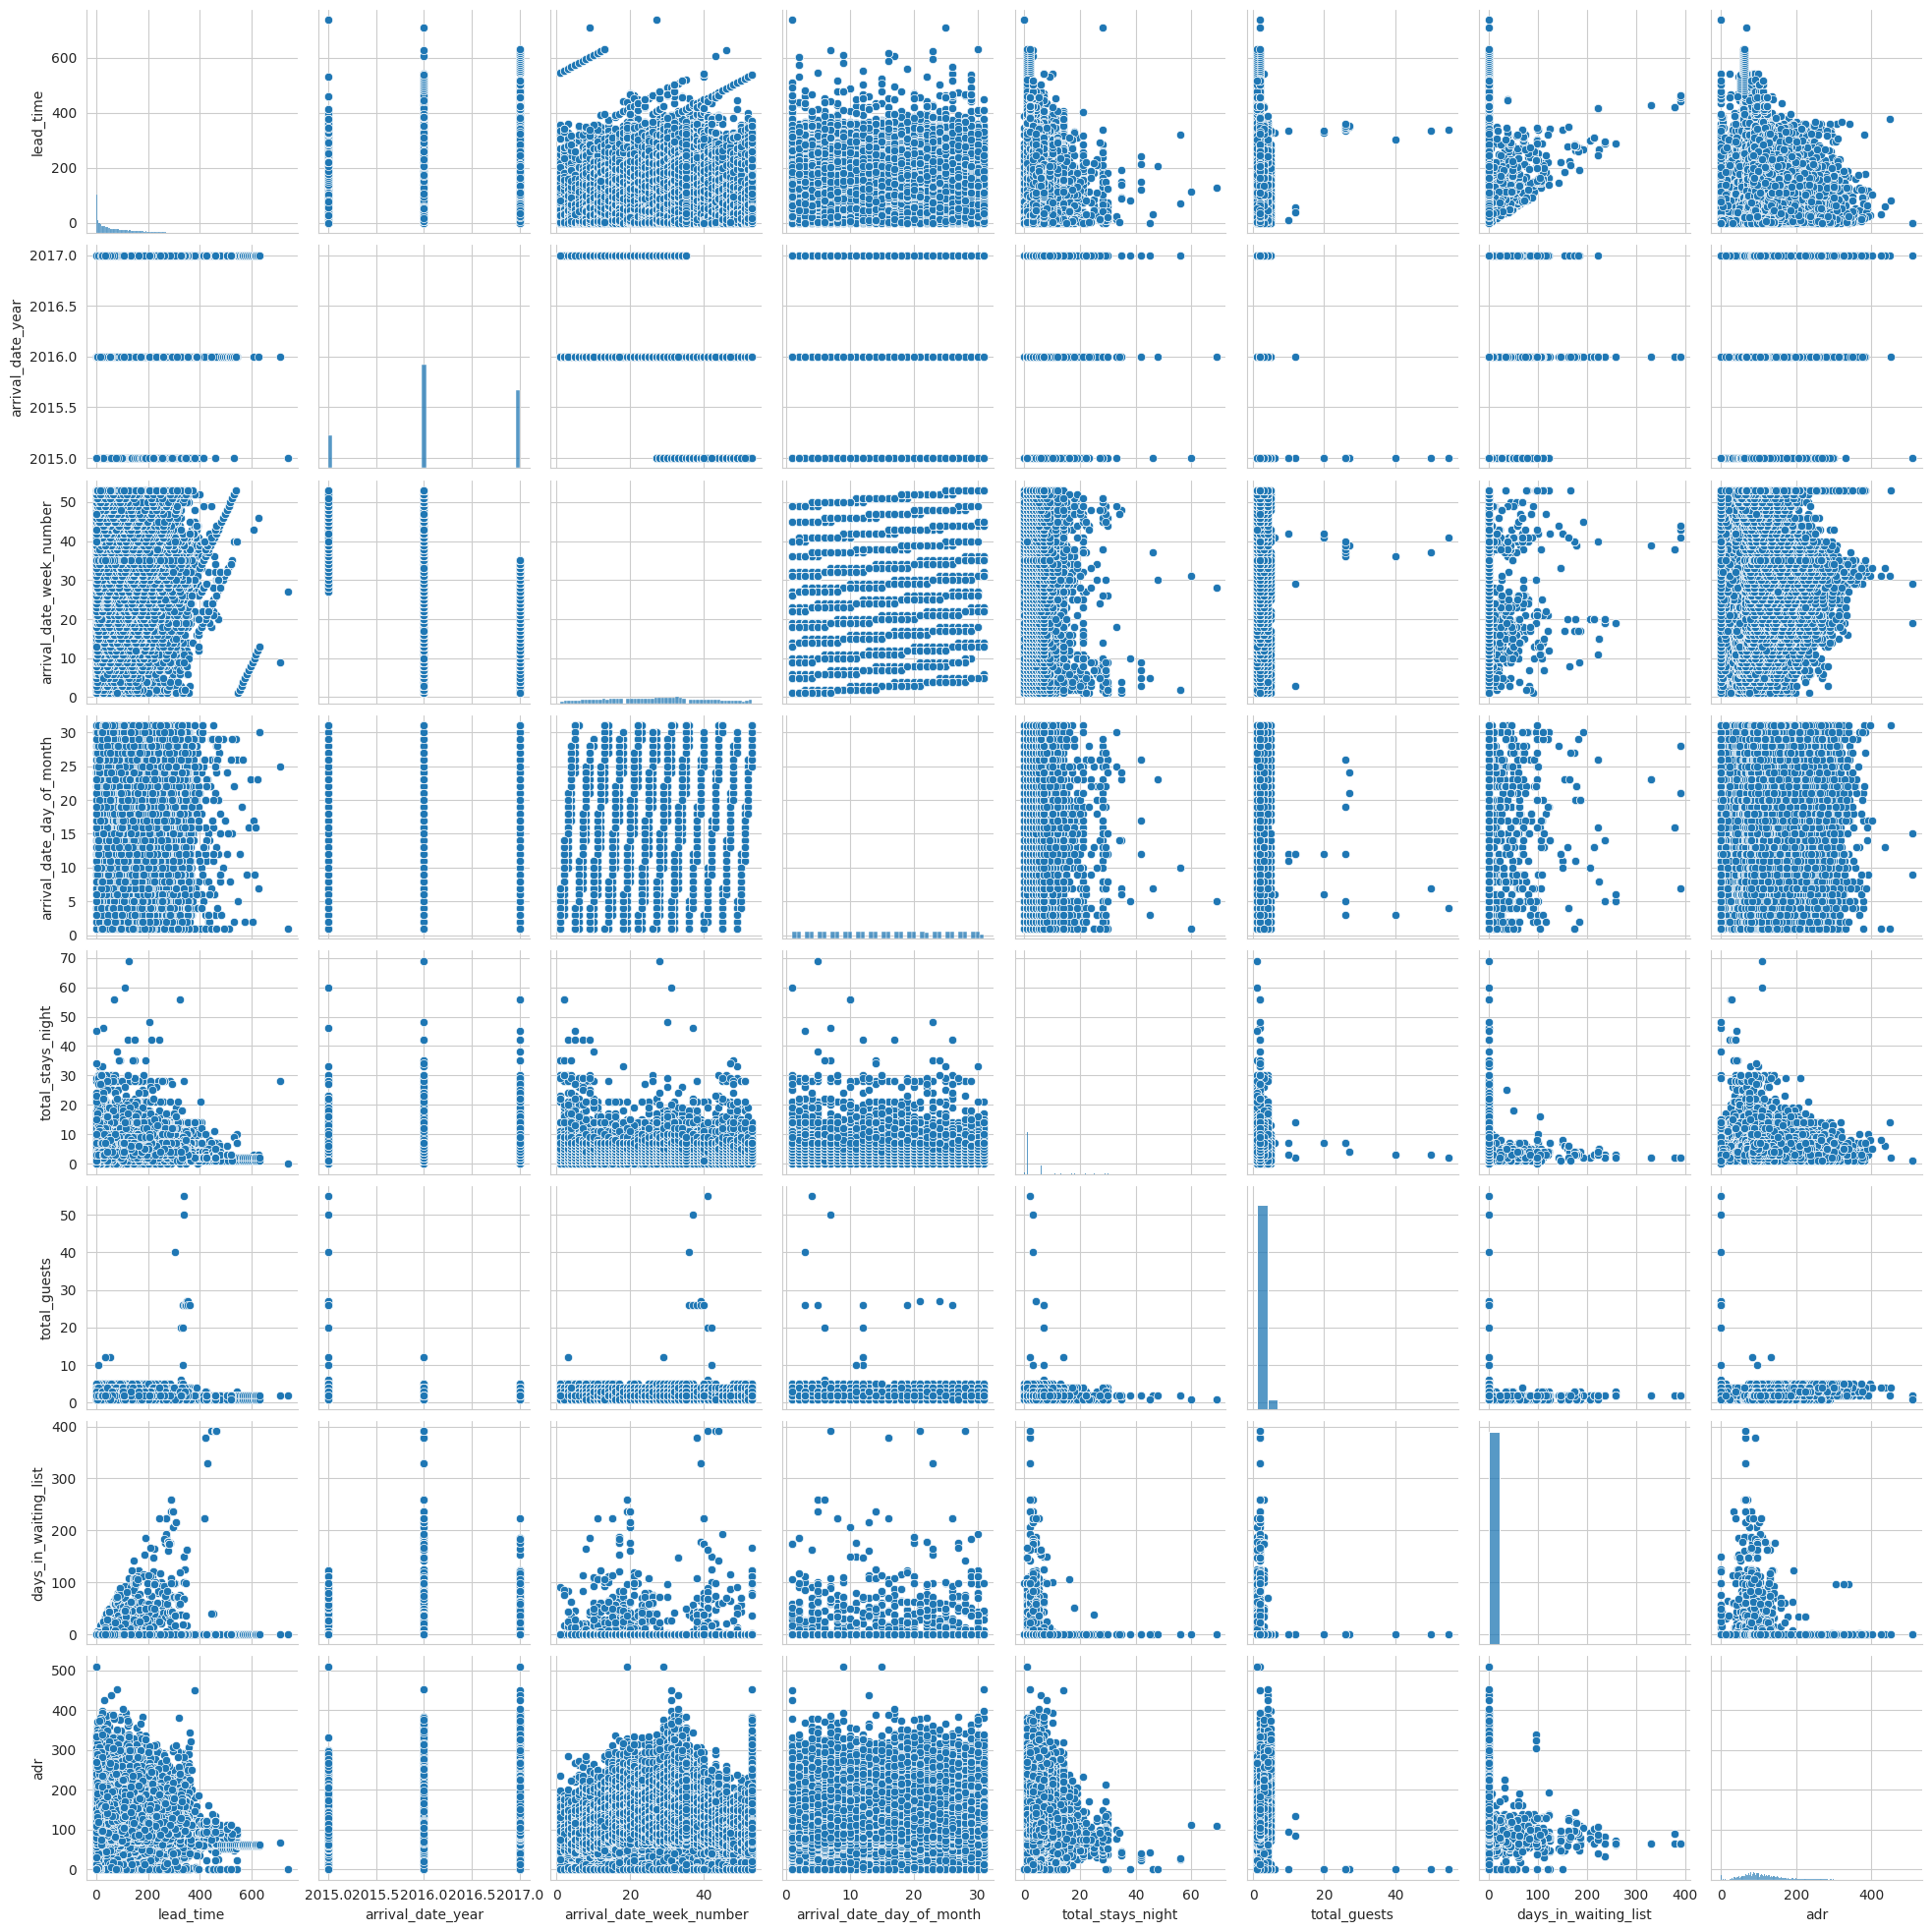

In [53]:
# Pair Plot visualization code
# Filters and form a small dataset from the bigger dataset to plot pair plot
df_pair_plot = c_hba_df[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                         'total_stays_night', 'total_guests', 'days_in_waiting_list', 'adr']]
plt.figure(figsize=(10,8))
pair_plot = sns.pairplot(df_pair_plot)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is useful in Ploting pairwise relationships for numeric variables in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column

##### 2. What is/are the insight(s) found from the chart?

1). From the above pair plot between lead_time and adr we can say that there is a negative relation between these two quantities, as lead_time(x-axis) increases we can observe a decrease in adr(y-axis).

2). From the pair plot between total_guests and adr we can say that with an increase in number of guests a fall in adr is visible, and adr is usually high when number of guest is low.

3). When we observe plot between days_in_waiting_list v/s adr, it is observed that days in waiting list increases, adr decreases.

4). Higher Days in waiting are observed for customers having their bookings for the year 2016.

5). Total_guests are higher in the year 2015

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

> 1). As 15 % of customers were not alloted reserved room, hotel management should focus and solve this issue so that all customers should be alloted the room which he/she reserved.

> 2). Hotel should have a proper cancelation policy as almost 25 % customers have canceled booking, to tackle this issue hotel could also offer discounts for the customers on confirming their bookings by paying a small token  amount for bookings.

> 3). In the month of August and July number of bookings are high as compared to rest of the year. This insight will help to focus more on this period as this might be holiday period, so that hotels should get more bookings in this duration.

> 4). Hotel management should focus design and implement strategies to increase adr for months in which adr is low, like focusing on getting bookings from corporates and aviation sector as they are usually high paying segments.

> 5). Country specific ad campaigns and special offers should be launched so as to attract customers from a specific countries.

> 6). Time to time inspection and reporting should be done so as to cross check the impact of policies implemented for improvement of business and profitability.

> 7). Also usually city hotels are preffered over resort hotels so necessary steps like transportation, pickup and drop facilities as resort hotels are usually far from city, should be taken to increase bookings in resort hotel.

> 8). As most of the bookings come from Online TA segment of the market, hotel should try to focus on getting more bookings from Corporate and Aviation segments as they are usually high paying market segments so that the ADR could be increased. because if hotel is getting most of the bookings from only one market segment it will make their business vulnerable and dependent only on one segment of the customers.

# **Conclusion**

1). There is a negative relation between lead_time and adr, as lead_time increases we can observe a decrease in adr.

2). Increase in number of guests results in a fall in adr, and adr is usually high when number of guest is low.

3). It is observed that as days in waiting list increases, adr decreases.

4). Higher Days in waiting are observed for customers having their bookings for the year 2016.

5). Total_guests are higher in the year 2015 as compared to year 2016 and 2017.

6). August month contributes highest number of bookings followed by July, May, April, etc.

7). ADR is highest for the month of August followed by July, June, September and so on.

8). Maximun guests come from Portugal(PRT) followed by Great Britain, France and so on.

9). Very less bookings are canceled considering the fact that reserved room is not assigned. so there is no direct correlation between booking being canceled and reserved room not assigned to the customer.

10). Agent with ID 9 tops the list w.r.t number of bookings.

11). In approximately 85 % of the cases reserved room is assigned to the customer.

12). Maximum bookings came from TA/TO distribution channel.

13). 2016 is the year that holds around 49 % bookings out of the total bookings.

14). 72 % bookings are not canceled.

15). City hotels are more preferred over resort hotels.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***